<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "blue">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>Why did you choose this web site?</li>
<li>What is your area of interest from it?</li>
Then add screenshot from the site.(just copy and paste the image in the text-box or insert it from your computer)




 -Оваа веб страница koronavirus.gov.mk ја избрав се со цел да се проучат и издвојат статистики поврзани со пациенти настрадани од смртоносниот вирус

 -Поле на интерес ми се медицински проучувања и предмети поврзани со Вештачка интелигенција, Машинско учење, Наука за податоци и Роботика, но голема примена гледам о нив во медицината за зајакнување на истата.

add the screenshot here

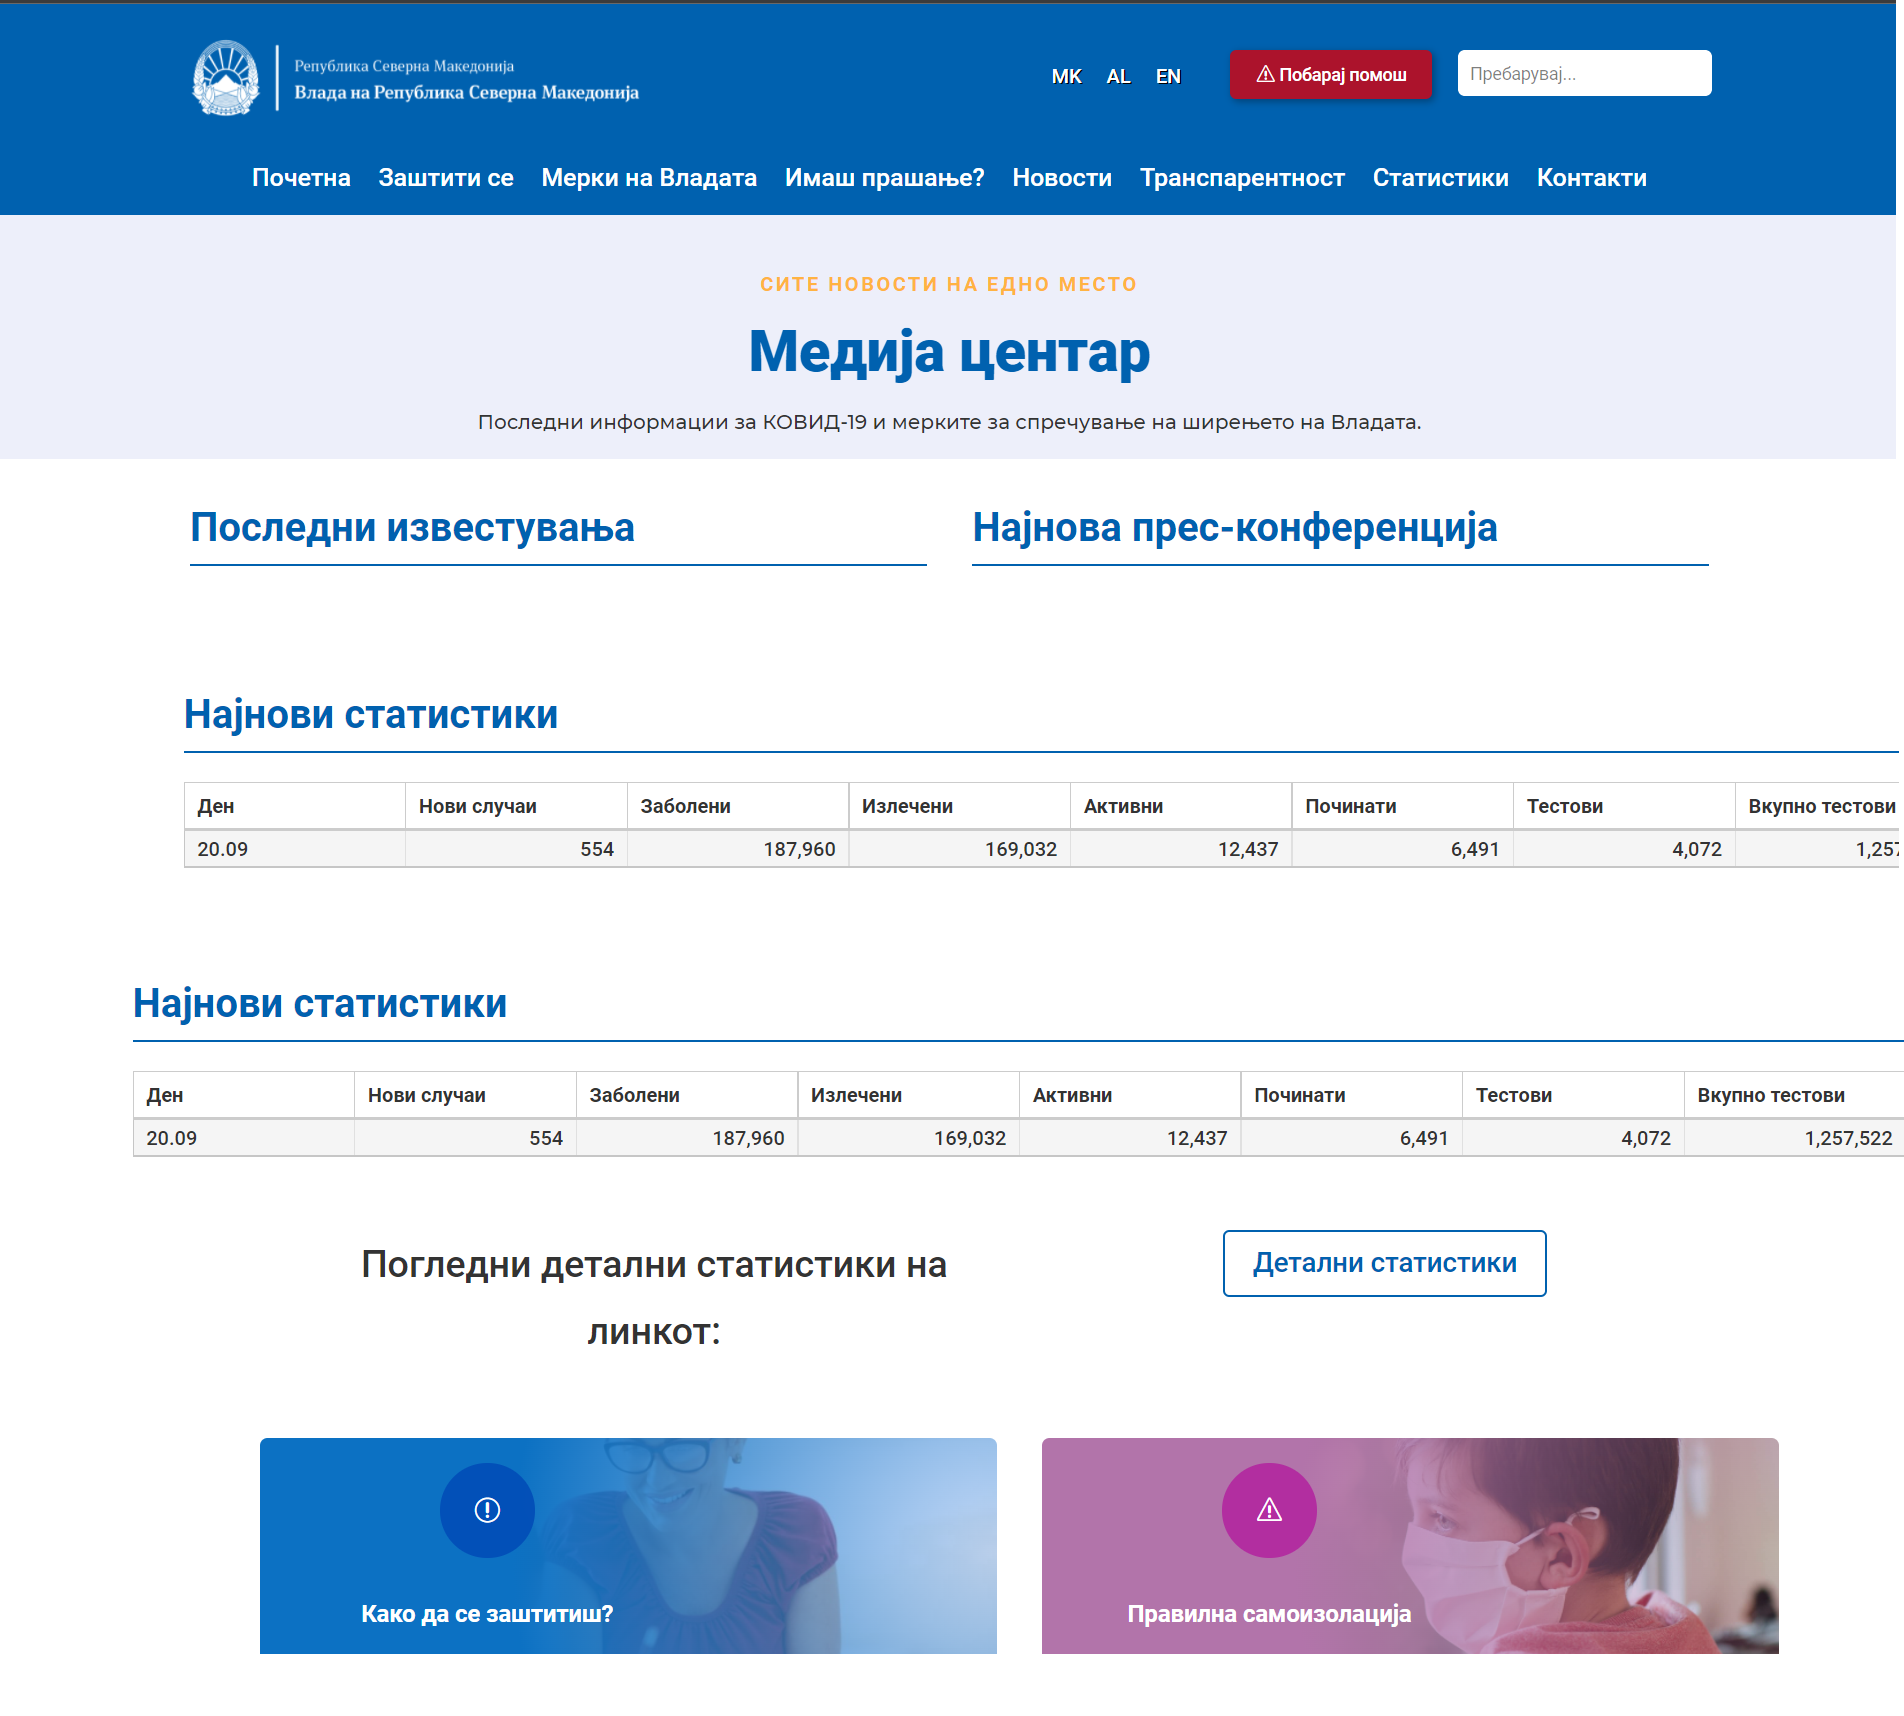

# <font color='Orange'>Requirements specified for Web Scraping</font>

Import all libraries and modules that you are going to use.

In [1]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
import numpy as np
import pandas as pd


import requests
from bs4 import BeautifulSoup
from IPython.display import HTML


# <font color = 'Orange'> Start the scraping by sending HTTP request</font>

 **Fetch a website's content - send request**

In [2]:
snapshot_url = 'https://koronavirus.gov.mk/vesti'

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.


If your webpage is responding with 400, then try again or change it with another one having similar content.

In [3]:
# Setting up 'requests' to make HTTPS requests properly
requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

snapshot_page = requests.get(snapshot_url)
snapshot_page

<Response [200]>

Webpage успешно, одговор 200 ОК 
<Response [200]>

In [4]:
snapshot = requests.get(snapshot_url)
raw_html = snapshot.text
print(raw_html[:1000])

<!DOCTYPE html>
<html lang="mk-MK">
<head>
<meta charset="UTF-8"/>
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<link rel="pingback" href="https://koronavirus.gov.mk/xmlrpc.php"/>
<link rel="manifest" href="/superpwa-manifest.json">
<link rel="prefetch" href="/superpwa-manifest.json">
<meta name="theme-color" content="#ffffff">
<meta name="mobile-web-app-capable" content="yes">
<meta name="apple-touch-fullscreen" content="yes">
<meta name="apple-mobile-web-app-title" content="Koronavirus MK">
<meta name="application-name" content="Koronavirus MK">
<meta name="apple-mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-status-bar-style" content="default">
<link rel="apple-touch-icon" sizes="192x192" href="https://koronavirus.gov.mk/wp-content/uploads/2020/03/GRB_Zlaten.png">
<link rel="apple-touch-icon" sizes="512x512" href="https://koronavirus.gov.mk/wp-content/uploads/2020/03/Grb_512x512.png">
<title>Најновите информации за Коронавирусот во Северна Македониј

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [5]:
soup_parsing = BeautifulSoup(raw_html, 'html.parser')

In [6]:
soup_parsing.select_one('title')

<title>Најновите информации за Коронавирусот во Северна Македонија</title>

**Print the HTML code that you get**

In [7]:
soup_parsing

<!DOCTYPE html>

<html lang="mk-MK">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://koronavirus.gov.mk/xmlrpc.php" rel="pingback"/>
<link href="/superpwa-manifest.json" rel="manifest"/>
<link href="/superpwa-manifest.json" rel="prefetch"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="yes" name="apple-touch-fullscreen"/>
<meta content="Koronavirus MK" name="apple-mobile-web-app-title"/>
<meta content="Koronavirus MK" name="application-name"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://koronavirus.gov.mk/wp-content/uploads/2020/03/GRB_Zlaten.png" rel="apple-touch-icon" sizes="192x192"/>
<link href="https://koronavirus.gov.mk/wp-content/uploads/2020/03/Grb_512x512.png" rel="apple-touch-icon" sizes="512x512"/>
<title>Најновите информации за Коронавирусот во Севе

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

`add your attributes here for building the dataset`

entry-featured-image-url , published, entry-title, entry-content, post-meta

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [8]:
entry_title = soup_parsing.select('.entry-title')
HTML(entry_title[0].prettify())

In [9]:
len(entry_title)


15

In [10]:
str(entry_title[0].prettify())

'<h2 class="entry-title">\n <a href="https://koronavirus.gov.mk/vesti/223377">\n  Вкупно се аплицирани 1.620.860 дози вакцини, а ревакцинирани 46% од полнолетните граѓани во државата\n </a>\n</h2>\n'

**Add as many codeboxes as you need for selecting all the html elements**

In [68]:
featured_image = soup_parsing.select('a.entry-featured-image-url')
published_date = soup_parsing.select('.published')
entry_content = soup_parsing.select('.entry-content')
post_meta = soup_parsing.select('p.post-meta > a')

In [12]:
str(published_date[0].prettify())

'<span class="published">\n 03.11.2021\n</span>\n'

In [13]:
soup_parsing.find_all('span', {'class': 'published'})

[<span class="published">03.11.2021</span>,
 <span class="published">02.11.2021</span>,
 <span class="published">23.08.2021</span>,
 <span class="published">03.11.2021</span>,
 <span class="published">02.11.2021</span>,
 <span class="published">01.11.2021</span>,
 <span class="published">01.11.2021</span>,
 <span class="published">31.10.2021</span>,
 <span class="published">30.10.2021</span>,
 <span class="published">29.10.2021</span>,
 <span class="published">29.10.2021</span>,
 <span class="published">29.10.2021</span>,
 <span class="published">29.10.2021</span>,
 <span class="published">28.10.2021</span>,
 <span class="published">28.10.2021</span>]

In [14]:
HTML(entry_content[0].prettify())

Ден,Нови случаи,Заболени,Излечени,Активни,Починати,Тестови,Вкупно тестови
20.09,554,"187,960","169,032","12,437","6,491","4,072","1,257,522"


In [15]:
str(entry_content[0].prettify())

'<div class="entry-content">\n <div class="et-l et-l--post">\n  <div class="et_builder_inner_content et_pb_gutters2">\n   <div class="et_pb_section et_pb_section_0 et_pb_with_background et_section_regular">\n    <div class="et_pb_row et_pb_row_0">\n     <div class="et_pb_column et_pb_column_4_4 et_pb_column_0 et_pb_css_mix_blend_mode_passthrough et-last-child">\n      <div class="et_pb_module et_pb_text et_pb_text_0 et_pb_text_align_center et_pb_bg_layout_light">\n       <div class="et_pb_text_inner">\n        <h6>\n         Сите новости на едно место\n        </h6>\n        <h2>\n         Медија центар\n        </h2>\n        <p>\n         Последни информации за КОВИД-19 и мерките за спречување на ширењето на Владата.\n        </p>\n       </div>\n      </div>\n     </div>\n    </div>\n   </div>\n   <div class="et_pb_section et_pb_section_1 et_section_specialty">\n    <div class="et_pb_row">\n     <div class="et_pb_column et_pb_column_1_2 et_pb_column_1 et_pb_specialty_column et_pb_cs

In [16]:
HTML(featured_image[0].prettify())

In [70]:
HTML(post_meta[1].prettify())

In [71]:
str(post_meta[1].prettify())

'<a href="https://koronavirus.gov.mk/vesti/category/soopshtenija" rel="tag">\n Соопштенија\n</a>'

**Create lists with the extracted data from the html elements that you selected**

In [17]:
#all entry-titles
titles_entry = []
for i in range(0,len(entry_title)):
  titles_entry.append(entry_title[i].select_one('a').text)

In [18]:
#all published_dates
dates = []
for i in range(0,len(published_date)):
  dates.append(published_date[i].text)

In [19]:
#all contents
contents = []
for i in range(0,len(entry_content)):
  contents.append(entry_content[i].select_one('div').text)

In [73]:
#all post classes, tags
meta_classes = []
for i in range(0,len(post_meta)):
  meta_classes.append(post_meta[i].text)

**Print all lists that are containing the elements**

In [ ]:
titles_entry

['Денес се регистрирани 153 нови позитивни случаи на КОВИД-19 – вкупната бројка на дијагностицирани лица изнесува 202.705 – Оздравени се 309 пациенти – пријавени се 11 починати лица во изминативе 24 часа.',
 'Вкупно се аплицирани 1.611.685 дози вакцини, а ревакцинирани 46% од полнолетните граѓани во државата',
 'Заев и Филипче ја промовираа кампањата „За моментите на среќа – Вакцинирај се!“: Вакцините се безбедни и само со вакцинација ќе го сочуваме личното и колективното здравје',
 'Денес се регистрирани 153 нови позитивни случаи на КОВИД-19 – вкупната бројка на дијагностицирани лица изнесува 202.705 – Оздравени се 309 пациенти – пријавени се 11 починати лица во изминативе 24 часа.',
 'Вкупно се аплицирани 1.611.685 дози вакцини, а ревакцинирани 46% од полнолетните граѓани во државата',
 'Денес се регистрирани 349 нови позитивни случаи на КОВИД-19 – Вкупната бројка на дијагностицирани лица со КОВИД-19 изнесува 202.552 – Оздравени се 208 пациенти – Пријавени се 12 починати лица во изми

In [ ]:
dates

['01.11.2021',
 '01.11.2021',
 '23.08.2021',
 '01.11.2021',
 '01.11.2021',
 '31.10.2021',
 '30.10.2021',
 '29.10.2021',
 '29.10.2021',
 '29.10.2021',
 '29.10.2021',
 '28.10.2021',
 '28.10.2021',
 '27.10.2021',
 '27.10.2021']

In [ ]:
contents

['\n\n\n\n\n\nСите новости на едно место Медија центар Последни информации за КОВИД-19 и мерките за спречување на ширењето на Владата.\n\n\n\n\n\nПоследни известувања\n\n\n\n\n\n\nДенес се регистрирани 153 нови позитивни случаи на КОВИД-19 – вкупната бројка на дијагностицирани лица изнесува 202.705 – Оздравени се 309 пациенти – пријавени се 11 починати лица во изминативе 24 часа.\n01.11.2021 | Featured, ИзвестувањаМинистерството за здравство информира, согласно податоците од Институтот за јавно здравје дека во последните 24 часа: Направени се 1.549 тестирања, а регистрирани се 153 нови случаи на КОВИД-19:Скопје – 108, Куманово – 12, Прилеп – 9, Кавадарци – 6, Битола – 5, Крива...\n\n\n\n\n\nВкупно се аплицирани 1.611.685 дози вакцини, а ревакцинирани 46% од полнолетните граѓани во државата\n01.11.2021 | Featured, СоопштенијаВо петокот и во саботата аплицирани се вкупно 5.556 дози вакцини, од кои 950 се аплицирани како прва доза, 1.124 се ревакцинирани, а 3.482 граѓани примиле трета доз

In [74]:
meta_classes

['Featured',
 'Соопштенија',
 'Featured',
 'Известувања',
 'Featured',
 'Прес-конференции',
 'Соопштенија',
 'Featured',
 'Соопштенија',
 'Featured',
 'Известувања',
 'Featured',
 'Известувања',
 'Featured',
 'Соопштенија',
 'Featured',
 'Известувања',
 'Featured',
 'Известувања',
 'Featured',
 'Известувања',
 'Featured',
 'Известувања',
 'Featured',
 'Соопштенија',
 'Featured',
 'Известувања',
 'Featured',
 'Известувања',
 'Featured',
 'Известувања']

**Check if all lists are the same size**

In [78]:
entry_length = len(titles_entry)

In [77]:
dates_length = len(dates)

In [76]:
contents_length = len(contents)

In [75]:
classes_length = len(meta_classes)

In [79]:
print(entry_length)
print(dates_length)
print(contents_length)
print(classes_length)

15
15
1
31


In [80]:
print((entry_length == dates_length == contents_length == classes_length))

False


In [ ]:
print((entry_length == dates_length))

True


# <font color='Orange'>Create a Pandas DataFrame</font>

**Create the DataFrame from the lists you get and name your *Columns***

In [88]:
matrix = []
for i in range(0, len(titles_entry)):
    matrix.append([titles_entry[i],dates[i], meta_classes[i]])


df_pandas = pd.DataFrame(np.array(matrix),columns=['Titles','Dates', 'Class'])

**Print the dataset you obtain**

In [89]:
df_pandas

,Titles,Dates,Class
0,"Вкупно се аплицирани 1.620.860 дози вакцини, а...",03.11.2021,Featured
1,Денес се регистрирани 593 нови позитивни случа...,02.11.2021,Соопштенија
2,Заев и Филипче ја промовираа кампањата „За мом...,23.08.2021,Featured
3,"Вкупно се аплицирани 1.620.860 дози вакцини, а...",03.11.2021,Известувања
4,Денес се регистрирани 593 нови позитивни случа...,02.11.2021,Featured
5,Денес се регистрирани 153 нови позитивни случа...,01.11.2021,Прес-конференции
6,"Вкупно се аплицирани 1.611.685 дози вакцини, а...",01.11.2021,Соопштенија
7,Денес се регистрирани 349 нови позитивни случа...,31.10.2021,Featured
8,Денес се регистрирани 495 нови позитивни случа...,30.10.2021,Соопштенија
9,Денес се регистрирани 417 нови позитивни случа...,29.10.2021,Featured


# <font color = 'Green'>Advanced part</font>

<font color = 'blue'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font>
Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.

Your task is to extract data by sending a request using Selenium on more complicated pages with Forms or Javascript. 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/


In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
# divs = wd.find_elements_by_css_selector('div')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

<html class="no-js" lang="en-US"><!--<![endif]--><head>

<title>Please Wait... | Cloudflare</title>
  
<meta name="captcha-bypass" id="captcha-bypass">
<meta charset="UTF-8">
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
<meta name="robots" content="noindex, nofollow">
<meta name="viewport" content="width=device-width,initial-scale=1">
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection">
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<style type="text/css">body{margin:0;padding:0}</style>


<!--[if gte IE 10]><!-->
<script>
  if (!navigator.cookieEnabled) {
    window.addEventListener('DOMContentLoaded', function () {
      var cookieEl = document.getElementById('cookie-alert');
      cookieEl.style.display = 'block';
    })

## <font color = 'Green'>Extra task 2: Scrape some Google site</font>

Your task is to get data from some of the Google sites. For example, get user comments and rating for applications on Google Play (https://play.google.com/store/apps/category/EDUCATION), or scrape the google search results for example https://www.google.com/search?q=finki.